<a href="https://colab.research.google.com/github/kRuvpin/KCBV_Mamang/blob/main/awas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 8.0 MB/s 
     |████████████████████████████████| 30.5 MB 58.2 MB/s 
     |████████████████████████████████| 6.3 MB 43.7 MB/s 
     |████████████████████████████████| 219 kB 60.4 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=48ca37e22b3235737fc08792fe237ea24f6b3ebf700932d1bab2f0774a7017be
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [3]:
import zipfile

# Download zip file of pizza_steak images
!wget  https://raw.githubusercontent.com/kRuvpin/KCBV_Mamang/main/database.csv.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("database.csv.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-30 14:20:57--  https://raw.githubusercontent.com/kRuvpin/KCBV_Mamang/main/database.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604367 (590K) [application/zip]
Saving to: ‘database.csv.zip.1’

database.csv.zip.1  100%[===================>] 590.20K  --.-KB/s    in 0.03s   

2022-06-30 14:20:57 (16.9 MB/s) - ‘database.csv.zip.1’ saved [604367/604367]



In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
sns.set(style="darkgrid")

In [7]:
data = pd.read_csv('database.csv')

In [8]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [9]:
data.shape

(23412, 21)

In [10]:
print("Min Value: "+ str(data['Magnitude'].min()))
print("Max Value: " + str(data['Magnitude'].max()))

Min Value: 5.5
Max Value: 9.1


In [11]:
g8 = data[data['Magnitude'] > 8]
g8['Location Source'].value_counts()

US        22
ISCGEM     5
Name: Location Source, dtype: int64

Text(0, 0.5, 'Number of Occurrences')

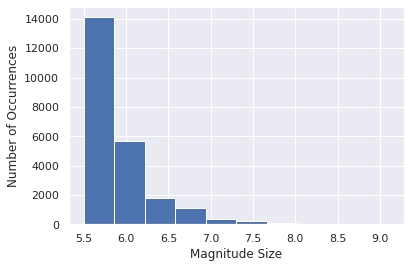

In [12]:
plt.hist(data['Magnitude'])

plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')

 local magnitude (ML), surface-wave magnitude (Ms), body-wave magnitude (Mb), moment magnitude (Mw)


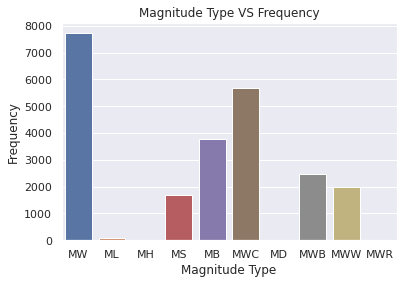

In [13]:
sns.countplot(x="Magnitude Type", data=data)
plt.ylabel('Frequency')
plt.title('Magnitude Type VS Frequency')
print(" local magnitude (ML), surface-wave magnitude (Ms), body-wave magnitude (Mb), moment magnitude (Mw)")

Text(0.5, 1.0, 'Number of Earthquakes In Each Year')

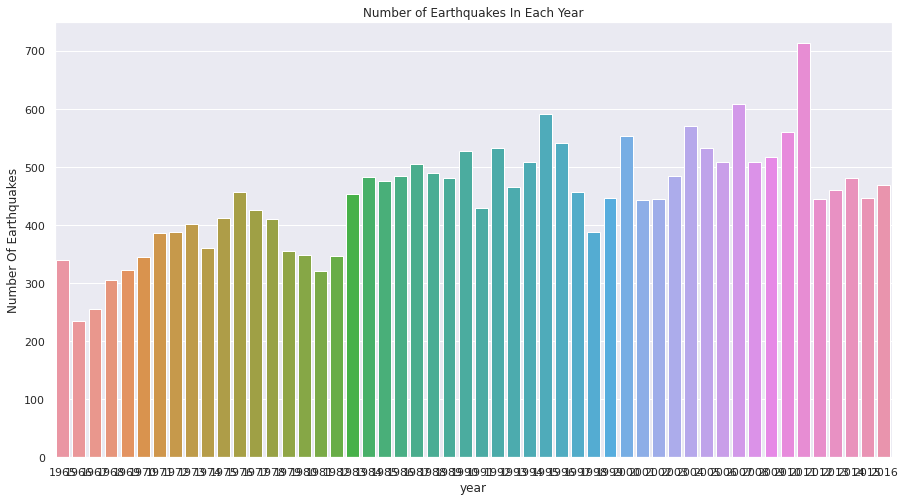

In [14]:
import datetime
data['date'] = data['Date'].apply(lambda x: pd.to_datetime(x))
data['year'] = data['date'].apply(lambda x: str(x).split('-')[0])
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.0)
sns.countplot(x="year", data=data)
plt.ylabel('Number Of Earthquakes')
plt.title('Number of Earthquakes In Each Year')

In [15]:
data['year'].value_counts()[:1]

2011    713
Name: year, dtype: int64

In [17]:
data.loc[data['Magnitude'] >=8, 'Class'] = 'ajur'
data.loc[ (data['Magnitude'] >= 7) & (data['Magnitude'] < 7.9), 'Class'] = 'awa'
data.loc[ (data['Magnitude'] >= 6) & (data['Magnitude'] < 6.9), 'Class'] = 'siaga'
data.loc[ (data['Magnitude'] >= 5.5) & (data['Magnitude'] < 5.9), 'Class'] = 'normal'

Text(0.5, 1.0, 'Magnitude Class VS Frequency')

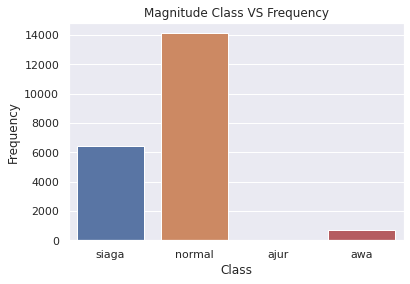

In [18]:
sns.countplot(x="Class", data=data)
plt.ylabel('Frequency')
plt.title('Magnitude Class VS Frequency')

In [ ]:
import numpy as np 
import pandas as pd
import os
from tqdm import tqdm
from numpy.random import seed
seed(639)
from tensorflow.random import set_seed
set_seed(5944)

In [ ]:
float_data = pd.read_csv("train.csv", dtype={"acoustic_data": np.float32, "time_to_failure": np.float32}).values

In [ ]:
def extract_features(z):
     return np.c_[z.mean(axis=1), 
                  z.min(axis=1),
                  z.max(axis=1),
                  z.std(axis=1)]

In [ ]:
def create_X(x, last_index=None, n_steps=150, step_length=1000):
    if last_index == None:
        last_index=len(x)
       
    assert last_index - n_steps * step_length >= 0

    # Reshaping and approximate standardization with mean 5 and std 3.
    temp = (x[(last_index - n_steps * step_length):last_index].reshape(n_steps, -1) - 5 ) / 3
    
    # Extracts features of sequences of full length 1000, of the last 100 values and finally also 
    # of the last 10 observations. 
    return np.c_[extract_features(temp),
                 extract_features(temp[:, -step_length // 10:]),
                 extract_features(temp[:, -step_length // 100:])]

In [ ]:
n_features = create_X(float_data[0:150000]).shape[1]
print("Our RNN is based on %i features"% n_features)

In [ ]:
def generator(data, min_index=0, max_index=None, batch_size=16, n_steps=150, step_length=1000):
    if max_index is None:
        max_index = len(data) - 1
     
    while True:
        # Pick indices of ending positions
        rows = np.random.randint(min_index + n_steps * step_length, max_index, size=batch_size)
         
        # Initialize feature matrices and targets
        samples = np.zeros((batch_size, n_steps, n_features))
        targets = np.zeros(batch_size, )
        
        for j, row in enumerate(rows):
            samples[j] = create_X(data[:, 0], last_index=row, n_steps=n_steps, step_length=step_length)
            targets[j] = data[row - 1, 1]
        yield samples, targets

In [ ]:
batch_size = 32
second_earthquake = 50085877
float_data[second_earthquake, 1]

In [ ]:
train_gen = generator(float_data, batch_size=batch_size) # Use this for better score
# train_gen = generator(float_data, batch_size=batch_size, min_index=second_earthquake + 1)
valid_gen = generator(float_data, batch_size=batch_size, max_index=second_earthquake)

In [ ]:
import tensorflow as tf
# Define model
from keras.models import Sequential
from keras.layers import Dense#, CuDNNGRU
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.callbacks import ModelCheckpoint

In [ ]:
cb = [ModelCheckpoint("model.hdf5", save_best_only=True, period=3)]

In [ ]:
model = Sequential()
model.add(CuDNNGRU(48, input_shape=(None, n_features)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile and fit model
model.compile(optimizer=Adam(lr=0.0005), loss="mae")

history = model.fit(train_gen,
                              steps_per_epoch=1000,
                              epochs=30,
                              verbose=0,
                              callbacks=cb,
                              validation_data=valid_gen,
                              validation_steps=200)

In [ ]:
import matplotlib.pyplot as plt
def perf_plot(history, what = 'loss'):
    x = history.history[what]
    val_x = history.history['val_' + what]
    epochs = np.asarray(history.epoch) + 1
    
    plt.plot(epochs, x, 'bo', label = "Training " + what)
    plt.plot(epochs, val_x, 'b', label = "Validation " + what)
    plt.title("Training and validation " + what)
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    return None

In [ ]:
perf_plot(history)